In [19]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [20]:
#pip install -U scikit-learn imbalanced-learn
#pip install -U imbalanced-learn
#pip install xgboos

In [21]:
# Load the data
churning= pd.read_csv("Telco-Customer-Churn.csv")

In [22]:
#View the first five rows of the data set
churning[0:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
#creating a copy of the data
churning2= churning[:]

In [24]:
#Viewing the summary information of the data
churning2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
churning2.shape

(7043, 21)

In [26]:
churning2.drop("customerID", axis="columns", inplace=True)

In [27]:
churning2.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [28]:
churning2.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [29]:
#Viewing the unique values in the data set
for column in churning2:
    print(column, ":", churning2[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [30]:
pd.to_numeric(churning2.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [31]:
churning2[pd.to_numeric(churning2.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [32]:
churning2[pd.to_numeric(churning2.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

In [33]:
#Viewing index 488
churning2.iloc[488]['TotalCharges']

' '

In [34]:
#Dropping rows with null values
churning2= churning2[churning2.TotalCharges != " "]
churning2.shape

(7032, 20)

In [35]:
#Convert TotalCharges column to numeric
churning2.TotalCharges= pd.to_numeric(churning2.TotalCharges)

In [36]:
#Selecting tenures of both customers who stayed and left
tenure_churn_no = churning2[churning2.Churn == "No"].tenure
tenure_churn_yes= churning2[churning2.Churn == "Yes"].tenure

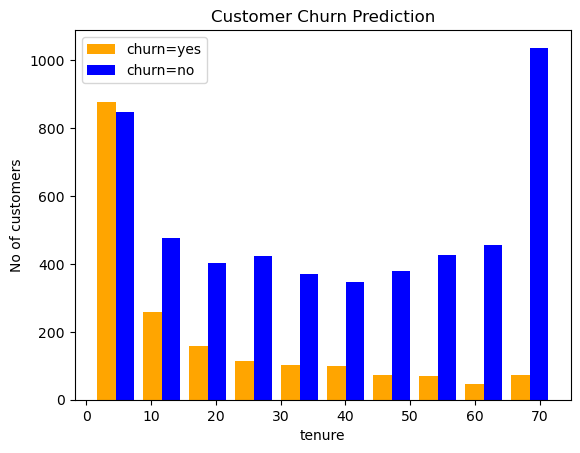

In [37]:
#Comparing no of customers who churned with their tenure

plt.hist([tenure_churn_yes, tenure_churn_no], 
         color= ['orange', 'blue'], label= ['churn=yes', 'churn=no'])
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction')
plt.legend()
plt.show()

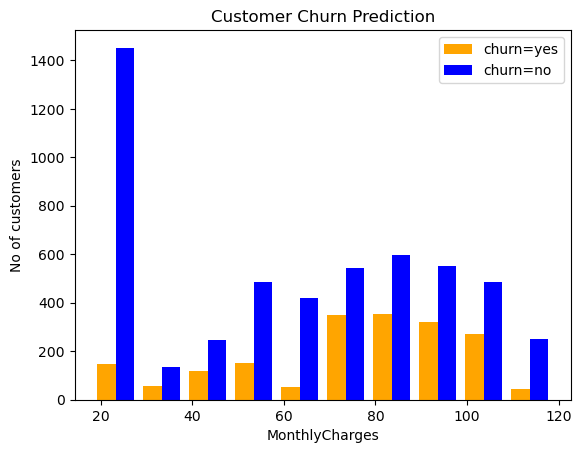

In [38]:
#Comparing no of customers who churned with MonthlyCharges

mc_churn_no = churning2[churning2.Churn == "No"].MonthlyCharges
mc_churn_yes= churning2[churning2.Churn == "Yes"].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], 
         color= ['orange', 'blue'], label= ['churn=yes', 'churn=no'])
plt.xlabel('MonthlyCharges')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction')
plt.legend()
plt.show()

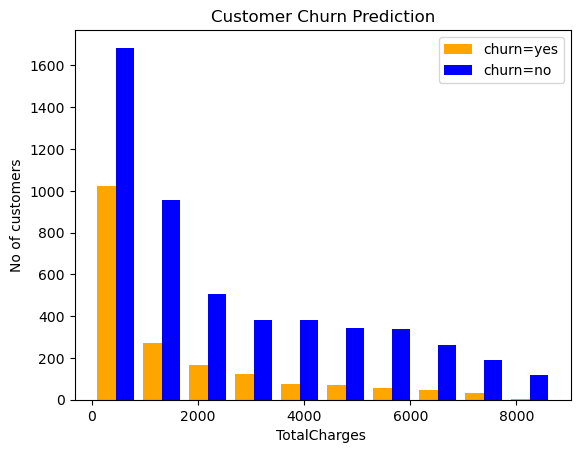

In [39]:
#Comparing no of customers who churned with TotalCharges 

mc_churn_no = churning2[churning2.Churn == "No"].TotalCharges 
mc_churn_yes= churning2[churning2.Churn == "Yes"].TotalCharges 

plt.hist([mc_churn_yes, mc_churn_no], 
         color= ['orange', 'blue'], label= ['churn=yes', 'churn=no'])
plt.xlabel('TotalCharges ')
plt.ylabel('No of customers')
plt.title('Customer Churn Prediction')
plt.legend()
plt.show()

In [40]:
for column in churning2:
    print(f'{column} : {churning2[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [41]:
churning2.replace('No internet service', "No", inplace=True)
churning2.replace('No phone service', "No", inplace=True)

In [42]:
def print_unique_col_values(df):
    for column in churning2:
        if df[column].dtypes == 'object':
            print(f'{column} : {churning2[column].unique()}')

In [43]:
print_unique_col_values(churning2)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [44]:
columns= ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
          "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in columns:
    churning2[col].replace({"Yes":1, "No":0}, inplace=True)

In [45]:
print_unique_col_values(churning2)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [46]:
churning2.gender.replace({"Female": 1, "Male": 0}, inplace=True)

In [47]:
for column in churning2:
    print(f'{column} : {churning2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [48]:
churning3= churning2[:]

In [49]:
churning3["Contract"].replace({"Month-to-month": 1, "One year": 2, "Two year": 3}, inplace=True)
churning3["PaymentMethod"].replace({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4}, inplace=True)
churning3["InternetService"].replace({"DSL": 1, "Fiber optic": 2, "No": 3}, inplace=True)

In [50]:
churning3[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


In [51]:
#churning5= pd.get_dummies(churning2, columns=["Contract", "PaymentMethod", "InternetService"], drop_first=True)

In [52]:
for column in churning3:
    print(f'{column} : {churning3[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : [1 2 3]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : [1 2 3]
PaperlessBilling : [1 0]
PaymentMethod : [1 2 3 4]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [53]:
churning4= pd.read_csv("dummy_churn.csv", index_col=0)
churning4[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
2,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
3,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
4,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
5,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [54]:
churning4.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

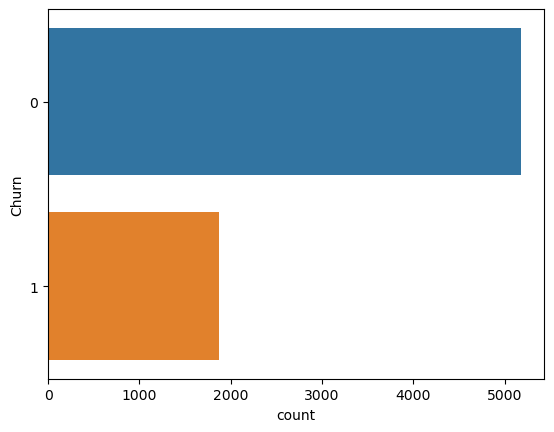

In [55]:
sns.countplot(y= churning4["Churn"])

In [56]:
churning4.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6774,0,1,1,0,37,1,1,0,0,0,...,92.50,3473.40,1,1,0,0,0,0,1,0
385,0,0,0,0,48,1,1,0,1,1,...,108.10,5067.45,0,1,0,0,1,0,0,0
5320,1,1,1,0,72,1,1,1,0,1,...,109.75,8075.35,0,1,0,0,1,0,0,1
3625,1,1,1,1,62,1,1,0,1,1,...,96.10,6019.35,0,1,0,0,0,1,0,0
6863,1,1,0,0,4,1,1,0,0,1,...,88.85,372.45,1,1,0,0,0,0,1,0


In [57]:
churning4.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year   

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [59]:
cols_to_scale= ["tenure", "MonthlyCharges", "TotalCharges"]

churning5= churning4[:]
churning5[cols_to_scale]= scaler.fit_transform(churning4[cols_to_scale])
churning5.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1362,0,0,0,0,0.055556,1,1,0,1,0,...,0.599005,0.035916,1,1,0,0,0,0,1,0
5472,1,0,0,0,0.402778,1,1,0,0,0,...,0.556716,0.227839,0,1,0,0,0,0,1,0
5850,0,0,1,0,0.875000,1,0,0,0,0,...,0.016915,0.140318,0,0,1,0,1,0,0,0
4446,1,0,0,0,0.875000,1,1,1,1,1,...,0.793532,0.715399,0,1,0,0,1,1,0,0
6734,0,0,0,0,0.375000,1,0,1,0,0,...,0.319403,0.160691,0,0,0,0,0,0,0,1


In [60]:
X= churning5.drop("Churn", axis= "columns")
y= churning5.Churn

# Applying SMOTE

In [61]:
#Applying smote to make the imbalaced data balance
X_res, y_res = SMOTE().fit_resample(X, y)

In [62]:
y_res.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size= 0.2, random_state=5)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
len(X_train.columns)

In [ ]:
X_train.sample(5)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log= LogisticRegression()

In [ ]:
log.fit(X_train, y_train)

In [ ]:
y_pred= log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

# Support Vector Classifier

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

In [ ]:
precision_score(y_test, y_pred2)

In [ ]:
recall_score(y_test, y_pred2)

In [ ]:
print(classification_report(y_test, y_pred2))

# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred3= knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3))

In [ ]:
accuracy_score(y_test, y_pred3)

In [ ]:
precision_score(y_test, y_pred3)

In [ ]:
recall_score(y_test, y_pred3)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree= DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
y_pred4= dtree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred4))

In [ ]:
accuracy_score(y_test, y_pred4)

In [ ]:
precision_score(y_test, y_pred3)

In [ ]:
recall_score(y_test, y_pred4)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred5= rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred5))

In [ ]:
accuracy_score(y_test, y_pred5)

In [ ]:
precision_score(y_test, y_pred5)

In [ ]:
recall_score(y_test, y_pred5)

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc= GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

In [ ]:
y_pred6= gbc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred5))

In [ ]:
accuracy_score(y_test, y_pred6)

In [ ]:
precision_score(y_test, y_pred6)

In [ ]:
recall_score(y_test, y_pred6)

# XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf= xgb.XGBClassifier()

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
y_pred7= xgb_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred7))

In [ ]:
accuracy_score(y_test, y_pred7)

In [ ]:
precision_score(y_test, y_pred7)

In [ ]:
recall_score(y_test, y_pred7)

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {
    "max_depth": [5],
    "learning_rate": [0, 0.01, 0.05, 0.1],
    "gamma": [1, 5, 10],
    "scale_pos_weight": [2, 5, 10, 20],
    "subsample": [1],
    "colsample_bytree": [1]
}

In [ ]:
xgb_clf2= xgb.XGBClassifier(objective= "binary:logistic")

In [ ]:
grid_cv= GridSearchCV(xgb_clf2, param_grid, n_jobs=-1, cv=3, scoring= "roc_auc")

In [ ]:
_= grid_cv.fit(X_train, y_train)

In [ ]:
print("Best Score:", grid_cv.best_score_)
print("Best params:", grid_cv.best_params_)

In [ ]:
#xgb_final= xgb.XGBClassifier(
    **grid_cv.best_params_, objective= "binary:logistic"
)
xgb_final.fit(X_train, y_train)
y_pred8= xgb_final.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred8)

In [ ]:
all_models= pd.DataFrame({
    "Models": ['LOG', 'SVC', 'KNN', 'DTREE', 'RF', 'GBC', "XGB"],
    "Accuracy": [accuracy_score(y_test, y_pred),
                accuracy_score(y_test, y_pred2),
                accuracy_score(y_test, y_pred3),
                accuracy_score(y_test, y_pred4),
                accuracy_score(y_test, y_pred5),
                accuracy_score(y_test, y_pred6),
                accuracy_score(y_test, y_pred7)],
    "Recall": [recall_score(y_test, y_pred),
              recall_score(y_test, y_pred2),
              recall_score(y_test, y_pred3),
              recall_score(y_test, y_pred4),
              recall_score(y_test, y_pred5),
              recall_score(y_test, y_pred6),
              recall_score(y_test, y_pred7)]
})

In [ ]:
all_models

In [ ]:
all_models.sort_values(by='Accuracy', ascending=False)

In [ ]:
sns.barplot(x= all_models.Models, y= all_models.Accuracy)